In [1]:
# import detailed-balance model package
from dbm import *

#setup plotting 
import matplotlib.pyplot as plt
plt.style.use('SciencePlots-APS.mplstyle')

In [2]:
# define chemical potential list without nonradiative generation ratio
def muList(temp_cell, temp_amb, egap):
    muVoc = np.round(cellTRDBM.find_mu(temp_cell, temp_amb, egap), decimals=6)
    return np.linspace(muVoc, 0.0, 501)
# define chemical potential list with nonradiative generation ratio
def muList_NR(temp_cell, temp_amb, egap, lambdaNR):
    muVoc = np.round(cellTRDBM.find_mu_NR(temp_cell, temp_amb, egap, lambdaNR), decimals=6)
    return np.linspace(muVoc, 0.0, 501)

In [3]:
# parameters
## Cell temperature
Tcell = np.array([500.0, 750.0, 1000.0])               # [K]
## ambient temperature
Tamb = 300.0                                           # [K]
## Global heat transfer coefficient 
UU = 2.0                                               # [W m^−2 K^−1]

## List of energy gap
EgapList = np.array([0.05, 0.1, 0.3, 0.5, 0.75, 1.0, 1.2, 1.5, 1.9])  # [eV]

## Power density and efficiency ideal case r.w.t chemical potential

In [4]:
# power density at the Egap = 0.3 eV
PowerDensity03 = np.array([
                 np.array([cellTRDBM.power_density(tc, Tamb, x, EgapList[2]) for x in muList(tc, Tamb, EgapList[2])])
                 for tc in Tcell
])

# efficiency at the Egap = 0.3 eV
EfficiencyIdeal03 = np.array([
                 np.array([cellTRDBM.efficiency_ideal(tc, Tamb, x, EgapList[2]) for x in muList(tc, Tamb, EgapList[2])])
                 for tc in Tcell
])

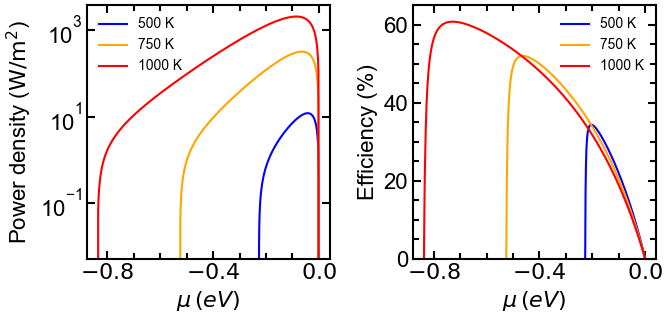

In [5]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

# ----------------------------------#
# Power density (Eg = 0.3 eV)
# ----------------------------------#
axes[0].plot(muList(Tcell[0], Tamb, EgapList[2]), PowerDensity03[0, :], color='blue', lw=1.5, label= '500 K')
axes[0].plot(muList(Tcell[1], Tamb, EgapList[2]), PowerDensity03[1, :], color='orange', lw=1.5, label= '750 K')
axes[0].plot(muList(Tcell[2], Tamb, EgapList[2]), PowerDensity03[2, :], color='red', lw=1.5, label= '1000 K')
# X-axis
axes[0].set_xlabel(r'$\mu \, (eV)$')
axes[0].set_xticks([-0.8, -0.4, 0.0])
axes[0].set_xticklabels([r'$-0.8$', r'$-0.4$', r'$0.0$'])
# Y-axis
axes[0].set_ylabel('Power density ($\mathrm{W/m}^2$)')
axes[0].set_yscale('log')  # Added logarithmic scale to the y-axis
axes[0].legend(loc='upper left', prop={'size': 10})

# ----------------------------------#
# Efficiency (Eg = 0.3 eV)
# ----------------------------------#
axes[1].plot(muList(Tcell[0], Tamb, EgapList[2]), EfficiencyIdeal03[0, :]*100, color='blue', lw=1.5, label= '500 K')
axes[1].plot(muList(Tcell[1], Tamb, EgapList[2]), EfficiencyIdeal03[1, :]*100, color='orange', lw=1.5, label= '750 K')
axes[1].plot(muList(Tcell[2], Tamb, EgapList[2]), EfficiencyIdeal03[2, :]*100, color='red', lw=1.5, label= '1000 K')
# X-axis
axes[1].set_xlabel(r'$\mu \, (eV)$')
axes[1].set_xticks([-0.8, -0.4, 0.0])
axes[1].set_xticklabels([r'$-0.8$', r'$-0.4$', r'$0.0$'])
# Y-axis
axes[1].set_ylabel('Efficiency (%)')
axes[1].set_ylim(0.0, 65.0)
axes[1].legend(loc='upper right', prop={'size': 10})

plt.tight_layout()
# save figure
#fig.savefig('./imag-rev/PowerDensity.svg')
plt.show()

## Power density without nonradiative generation ratio w.r.t bandgap 

In [6]:
# ----------------------------------#
# Tc = 500 K
# ----------------------------------#
PowerDensities_500 = np.array([
    np.array([cellTRDBM.power_density(Tcell[0], Tamb, x, egap) for x in muList(Tcell[0], Tamb, egap)])
    for egap in EgapList
])

# ----------------------------------#
# Tc = 750 K
# ----------------------------------#
PowerDensities_750 = np.array([
    np.array([cellTRDBM.power_density(Tcell[1], Tamb, x, egap) for x in muList(Tcell[1], Tamb, egap)])
    for egap in EgapList
])

# ----------------------------------#
# Tc = 1000 K
# ----------------------------------#
PowerDensities_1000 = np.array([
    np.array([cellTRDBM.power_density(Tcell[2], Tamb, x, egap) for x in muList(Tcell[2], Tamb, egap)])
    for egap in EgapList
])


# ----------------------------------#
# Maximum power density
# ----------------------------------#
MaxPowerDensity_500 = np.max(PowerDensities_500, axis=1)
MaxPowerDensity_750 = np.max(PowerDensities_750, axis=1)
MaxPowerDensity_1000 = np.max(PowerDensities_1000, axis=1)

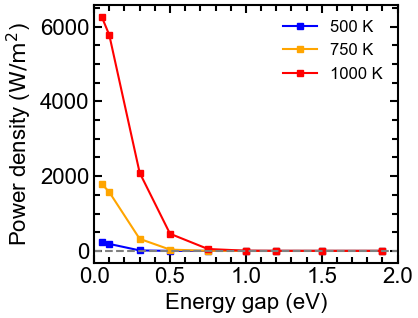

In [7]:
# plotting
fig = plt.figure(figsize=(4.5, 3.5))

plt.plot(EgapList, MaxPowerDensity_500, '-s', color='blue', label='500 K')
plt.plot(EgapList, MaxPowerDensity_750, '-s', color='orange', label='750 K')
plt.plot(EgapList, MaxPowerDensity_1000, '-s', color='red', label = '1000 K')
#X-Axis
plt.xlim(0.0, 2.0)
plt.xlabel('Energy gap (eV)')
# Y-axis
#plt.ylim(-400.0, 6000.)
plt.ylabel('Power density ($\mathrm{W/m}^2$)')
# set zero Y
plt.axhline(0.0, color='gray', ls='--')

plt.legend(loc='best', prop={'size': 12})

plt.tight_layout()
plt.show()

## Efficiency in the ideal case r.w.t bandgap

In [8]:
# ----------------------------------#
# Tc = 500 K
# ----------------------------------#
EfficiencyIdealCase_500 = np.array([
    np.array([cellTRDBM.efficiency_ideal(Tcell[0], Tamb, x, egap) for x in muList(Tcell[0], Tamb, egap)])
    for egap in EgapList
])

# ----------------------------------#
# Tc = 750 K
# ----------------------------------#
EfficiencyIdealCase_750 = np.array([
    np.array([cellTRDBM.efficiency_ideal(Tcell[1], Tamb, x, egap) for x in muList(Tcell[1], Tamb, egap)])
    for egap in EgapList
])

# ----------------------------------#
# Tc = 1000 K
# ----------------------------------#
EfficiencyIdealCase_1000 = np.array([
    np.array([cellTRDBM.efficiency_ideal(Tcell[2], Tamb, x, egap) for x in muList(Tcell[2], Tamb, egap)])
    for egap in EgapList
])

# ----------------------------------#
# Maximum efficiency ideal
# ----------------------------------#
MaxEfficiencyIdeal_500 = np.max(EfficiencyIdealCase_500, axis=1)*100
MaxEfficiencyIdeal_750 = np.max(EfficiencyIdealCase_750, axis=1)*100
MaxEfficiencyIdeal_1000 = np.max(EfficiencyIdealCase_1000, axis=1)*100
CarnotEfficiency_500 = cellTRDBM.carnot_efficiency(Tcell[0], Tamb)*100
CarnotEfficiency_750 = cellTRDBM.carnot_efficiency(Tcell[1], Tamb)*100
CarnotEfficiency_1000 = cellTRDBM.carnot_efficiency(Tcell[2], Tamb)*100

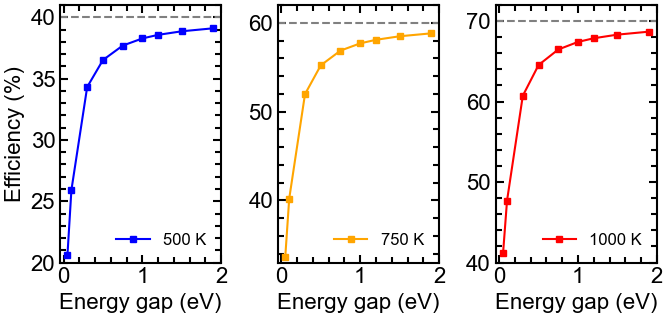

In [9]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3.5))

# ----------------------------------#
# Tc = 500 K
# ----------------------------------#
axes[0].plot(EgapList, MaxEfficiencyIdeal_500, '-s', color='blue', label = '500 K')
# X-axis
axes[0].set_xlabel('Energy gap (eV)')
axes[0].set_xticks([0,1,2]) 
axes[0].set_xticklabels(['0','1','2'])
# Y-axis
axes[0].set_ylabel('Efficiency (%)')
axes[0].set_ylim(20.0, 41.0)
axes[0].axhline(CarnotEfficiency_500, color='gray', ls='--')

axes[0].legend(loc='best', prop={'size': 12})


# ----------------------------------#
# Tc = 750 K
# ----------------------------------#
axes[1].plot(EgapList, MaxEfficiencyIdeal_750, '-s', color='orange', label = '750 K')
# X-Axis
axes[1].set_xlabel('Energy gap (eV)')
axes[1].set_xticks([0,1,2]) 
axes[1].set_xticklabels(['0','1','2'])
# Y-axis
axes[1].set_ylim(33.0, 62.0)
axes[1].axhline(CarnotEfficiency_750, color='gray', ls='--')

axes[1].legend(loc='best', prop={'size': 12})


# ----------------------------------#
# Tc = 1000 K
# ----------------------------------#
axes[2].plot(EgapList, MaxEfficiencyIdeal_1000, '-s', color='red', label = '1000 K')
# X-axis
axes[2].set_xlabel('Energy gap (eV)')
axes[2].set_xticks([0,1,2]) 
axes[2].set_xticklabels(['0','1','2'])
# Y-axis
axes[2].set_ylim(40.0, 72.0)
axes[2].axhline(CarnotEfficiency_1000, color='gray', ls='--')

axes[2].legend(loc='best', prop={'size': 12})


plt.tight_layout()

plt.show()

## Efficiency with sub-bandgap and heat losses w.r.t bandgap

In [10]:
# ----------------------------------#
# Tc = 500 K
# ----------------------------------#
EfficiencySubBandgapHeat_500 = np.array([
    np.array([cellTRDBM.efficiency_with_Subbandgap_Heat(Tcell[0], Tamb, x, egap, UU) for x in muList(Tcell[0], Tamb, egap)])
    for egap in EgapList
])

# ----------------------------------#
# Tc = 750 K
# ----------------------------------#
EfficiencySubBandgapHeat_750 = np.array([
    np.array([cellTRDBM.efficiency_with_Subbandgap_Heat(Tcell[1], Tamb, x, egap, UU) for x in muList(Tcell[1], Tamb, egap)])
    for egap in EgapList
])

# ----------------------------------#
# Tc = 1000 K
# ----------------------------------#
EfficiencySubBandgapHeat_1000 = np.array([
    np.array([cellTRDBM.efficiency_with_Subbandgap_Heat(Tcell[2], Tamb, x, egap, UU) for x in muList(Tcell[2], Tamb, egap)])
    for egap in EgapList
])

# ----------------------------------#
# Maximum efficiency with 
# sub-bandgap & heat losses
# ----------------------------------#
MaxEfficiencySubBandgapHeat_500 = np.max(EfficiencySubBandgapHeat_500, axis=1)*100
MaxEfficiencySubBandgapHeat_750 = np.max(EfficiencySubBandgapHeat_750, axis=1)*100
MaxEfficiencySubBandgapHeat_1000 = np.max(EfficiencySubBandgapHeat_1000, axis=1)*100

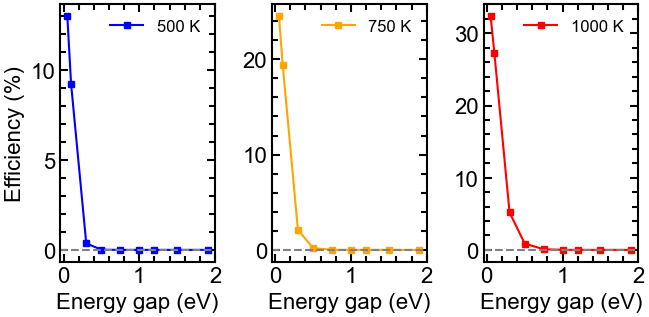

In [11]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3.5))

# ----------------------------------#
# Tc = 500 K
# ----------------------------------#
axes[0].plot(EgapList, MaxEfficiencySubBandgapHeat_500, '-s', color='blue', label = '500 K')
# X-axis
axes[0].set_xlabel('Energy gap (eV)')
axes[0].set_xticks([0,1,2]) 
axes[0].set_xticklabels(['0','1','2'])
# Y-axis
axes[0].set_ylabel('Efficiency (%)')
axes[0].axhline(0.0, color='gray', ls='--')

axes[0].legend(loc='best', prop={'size': 12})

# ----------------------------------#
# Tc = 750 K
# ----------------------------------#
axes[1].plot(EgapList, MaxEfficiencySubBandgapHeat_750, '-s', color='orange', label = '750 K')
# X-Axis
axes[1].set_xlabel('Energy gap (eV)')
axes[1].set_xticks([0,1,2]) 
axes[1].set_xticklabels(['0','1','2'])
# Y-axis
axes[1].axhline(0.0, color='gray', ls='--')

axes[1].legend(loc='best', prop={'size': 12})

# ----------------------------------#
# Tc = 1000 K
# ----------------------------------#
axes[2].plot(EgapList, MaxEfficiencySubBandgapHeat_1000, '-s', color='red', label = '1000 K')
# X-axis
axes[2].set_xlabel('Energy gap (eV)')
axes[2].set_xticks([0,1,2]) 
axes[2].set_xticklabels(['0','1','2'])
# Y-axis
axes[2].axhline(0.0, color='gray', ls='--')
axes[2].legend(loc='best', prop={'size': 12})

plt.tight_layout()

plt.show()

## Power density with nonradiative generation ratio w.r.t bandgap

## Efficiency with nonradiative generation ratio w.r.t bandgap